In [57]:
import pandas as pd
import matplotlib.pyplot as plt

### using cleaned data

In [81]:
AnimesDF = pd.read_csv('myanimelist/anime_cleaned.csv')
AnimesDF.info()
AnimesDF[['rank','popularity']].head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 33 columns):
anime_id           6668 non-null int64
title              6668 non-null object
title_english      3438 non-null object
title_japanese     6663 non-null object
title_synonyms     4481 non-null object
image_url          6666 non-null object
type               6668 non-null object
source             6668 non-null object
episodes           6668 non-null int64
status             6668 non-null object
airing             6668 non-null bool
aired_string       6668 non-null object
aired              6668 non-null object
duration           6668 non-null object
rating             6668 non-null object
score              6668 non-null float64
scored_by          6668 non-null int64
rank               6312 non-null float64
popularity         6668 non-null int64
members            6668 non-null int64
favorites          6668 non-null int64
background         813 non-null object
premiered          2

,rank,popularity
0,1274.0,231
1,727.0,366
2,1508.0,1173
3,307.0,916
4,50.0,426


In [77]:
# correlation between numeric columns
AnimesDF.corr()

,anime_id,episodes,airing,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
anime_id,1.000000,-0.109610,0.223734,-0.223733,-0.046057,0.274671,0.205813,-0.032301,-0.054066,-0.205838,0.623290
episodes,-0.109610,1.000000,-0.037289,0.076875,0.068544,-0.049064,-0.009545,0.079572,0.106804,-0.105711,-0.147920
airing,0.223734,-0.037289,1.000000,-0.066910,-0.046482,0.100467,0.079229,-0.030711,-0.004717,-0.086957,0.142681
score,-0.223733,0.076875,-0.066910,1.000000,0.381926,-0.898747,-0.688492,0.415626,0.256094,0.298989,0.042159
scored_by,-0.046057,0.068544,-0.046482,0.381926,1.000000,-0.356686,-0.425719,0.987107,0.793949,0.046203,0.110892
rank,0.274671,-0.049064,0.100467,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503,-0.294528,-0.063543
popularity,0.205813,-0.009545,0.079229,-0.688492,-0.425719,0.777302,1.000000,-0.474798,-0.210745,-0.159596,-0.236951
members,-0.032301,0.079572,-0.030711,0.415626,0.987107,-0.391524,-0.474798,1.000000,0.781565,0.039457,0.135725
favorites,-0.054066,0.106804,-0.004717,0.256094,0.793949,-0.208503,-0.210745,0.781565,1.000000,0.002669,0.031254
duration_min,-0.205838,-0.105711,-0.086957,0.298989,0.046203,-0.294528,-0.159596,0.039457,0.002669,1.000000,-0.183812


rank vs popularity = 0.77302

score vs rank = -0.898747

scored_by vs members = 0.987107

scored_by vs favorites = 0.793949

In [59]:
UsersDF = pd.read_csv('myanimelist/users_cleaned.csv')
UsersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 17 columns):
username                    108710 non-null object
user_id                     108711 non-null int64
user_watching               108711 non-null int64
user_completed              108711 non-null int64
user_onhold                 108711 non-null int64
user_dropped                108711 non-null int64
user_plantowatch            108711 non-null int64
user_days_spent_watching    108711 non-null float64
gender                      108711 non-null object
location                    108706 non-null object
birth_date                  108711 non-null object
access_rank                 0 non-null float64
join_date                   108711 non-null object
last_online                 108711 non-null object
stats_mean_score            108711 non-null float64
stats_rewatched             108711 non-null float64
stats_episodes              108711 non-null int64
dtypes: float64(4), int64(7), 

In [60]:
ScoresDF = pd.read_csv('myanimelist/animelists_cleaned.csv')
ScoresDF.info()
#only take the columns that are important for the recommendation system
ScoresDF = ScoresDF[['username', 'anime_id', 'my_score', 'my_status']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31284030 entries, 0 to 31284029
Data columns (total 11 columns):
username               object
anime_id               int64
my_watched_episodes    int64
my_start_date          object
my_finish_date         object
my_score               int64
my_status              int64
my_rewatching          float64
my_rewatching_ep       int64
my_last_updated        object
my_tags                object
dtypes: float64(1), int64(5), object(5)
memory usage: 2.6+ GB


In [61]:
# Counting how many relevant scores each user have done, resetting the index (so the series could become a DF again) and changing the column names
UsersAndScores = ScoresDF['username'].value_counts().reset_index().rename(columns={"username": "animes_rated", "index": "username"})
print(UsersAndScores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108709 entries, 0 to 108708
Data columns (total 2 columns):
username        108709 non-null object
animes_rated    108709 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ MB
None


### Threshold for animes_rated
when animes_rates >= 28 -> we lose 10% of the data


Users who rated 28+ animes:

       username  animes_rated
0        Exxorn          6536
1       uemmega          6367
2    JakCooper2          5923
3  DeadlyKizuna          5912
4   KanaenuYume          5234
<class 'pandas.core.frame.DataFrame'>
Int64Index: 97960 entries, 0 to 97959
Data columns (total 2 columns):
username        97960 non-null object
animes_rated    97960 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.2+ MB
None
       animes_rated
count  97960.000000
mean     317.918763
std      316.730077
min       28.000000
25%      113.000000
50%      225.000000
75%      414.000000
max     6536.000000


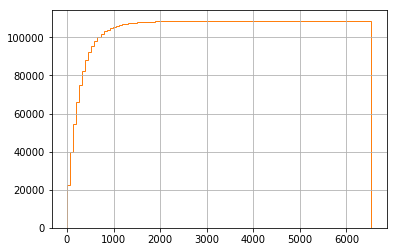

In [62]:
UsersAndScores['animes_rated'].hist( cumulative = True, histtype='step', bins=100, color='tab:orange')
UsersAndScores['animes_rated'].quantile(0.1) # 10th percentile = 28
UsersWith28plusRatings=UsersAndScores.loc[UsersAndScores['animes_rated'] >= 28]
print("\nUsers who rated 28+ animes:\n")
print(UsersWith28plusRatings.head())
print(UsersWith28plusRatings.info())
print(UsersWith28plusRatings.describe()) # total number of animes rated(with threshold condition) = 97960

**how to determine weight based on distribution of animes_rated**?
how to determining credibility of user?
- no of animes they rated/ total no of animes rated by all users
- for each anime, how far is he read from the median? -> could create bias? don't distinguish between fake and realistic reviews-> skews median from the real value 

what are the features that affect rating?
correlation for numbered values
translate non-numeric values to numbers to calculate correlation?
explore other features: effect of no episodes on the rating? 
popularity of anime impact on rating?
naming? -> focused or diverse audience, demographics affect the rating?

In [70]:
# user_rating_weightage = animes_rated(of user)/(total number of animes rated)
UsersWith28plusRatings['user_rating_weightage'] = UsersWith28plusRatings.loc[:,['animes_rated']].apply(lambda x:x/97960)
print(UsersWith28plusRatings.head())
print(UsersWith28plusRatings.info())
print(UsersWith28plusRatings.describe())

       username  animes_rated  weightage  user_rating_weightage
0        Exxorn          6536   0.066721               0.066721
1       uemmega          6367   0.064996               0.064996
2    JakCooper2          5923   0.060463               0.060463
3  DeadlyKizuna          5912   0.060351               0.060351
4   KanaenuYume          5234   0.053430               0.053430
<class 'pandas.core.frame.DataFrame'>
Int64Index: 97960 entries, 0 to 97959
Data columns (total 4 columns):
username                 97960 non-null object
animes_rated             97960 non-null int64
weightage                97960 non-null float64
user_rating_weightage    97960 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.2+ MB
None
       animes_rated     weightage  user_rating_weightage
count  97960.000000  97960.000000           97960.000000
mean     317.918763      0.003245               0.003245
std      316.730077      0.003233               0.003233
min       28.000000     

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Continuous vs discrete variables correlation
1.Score and gender correlation

In [119]:
usernameWith28plusRatings = UsersWith28plusRatings['username'].array
ScoresOfUsernameWith28plusRatings = ScoresDF[ScoresDF['username'].isin(usernameWith28plusRatings)]
append_userInfo = pd.merge(ScoresOfUsernameWith28plusRatings, UsersDF, how='inner', left_on = 'username', right_on = 'username')
append_userInfo.columns

Index([u'username', u'anime_id', u'my_score', u'my_status', u'user_id',
       u'user_watching', u'user_completed', u'user_onhold', u'user_dropped',
       u'user_plantowatch', u'user_days_spent_watching', u'gender',
       u'location', u'birth_date', u'access_rank', u'join_date',
       u'last_online', u'stats_mean_score', u'stats_rewatched',
       u'stats_episodes'],
      dtype='object')

In [128]:
ScoresOfUsernameWith28plusRatings.head()

,username,anime_id,my_score,my_status
0,karthiga,21,9,1
1,karthiga,59,7,2
2,karthiga,74,7,2
3,karthiga,120,7,2
4,karthiga,178,7,2


In [130]:
append_userInfo[['anime_id','my_score','gender']].head()

,anime_id,my_score,gender
0,21,9,Female
1,59,7,Female
2,74,7,Female
3,120,7,Female
4,178,7,Female


In [121]:
# append_userInfo['gender'].value_counts() #['Male','Female','Non-binary']
# remove 'non-binary'
numeric_gender = append_userInfo[append_userInfo['gender'].isin(['Male','Female'])].replace({'gender': {'Male': 0, 'Female': 1}})
gender_arr = numeric_gender['gender'].array

score_arr = numeric_gender['my_score'].array
from scipy import stats
stats.pointbiserialr(score_arr,gender_arr)

PointbiserialrResult(correlation=-0.06017745098144618, pvalue=0.0)

In [132]:
numeric_gender['gender'].value_counts()

0    22313316
1     8639225
Name: gender, dtype: int64

In [123]:
groupby_anime_id_scoreGender_corr = numeric_gender.groupby('anime_id')[['my_score','gender']].corr()
groupby_anime_id_scoreGender_corr.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13336 entries, (1, my_score) to (37896, gender)
Data columns (total 2 columns):
my_score    13148 non-null float64
gender      13172 non-null float64
dtypes: float64(2)
memory usage: 299.6+ KB


In [126]:
groupby_anime_id_scoreGender_corr.sort_values(by=['my_score'])

,,my_score,gender
anime_id,,,
37790,gender,-0.964901,1.0
34037,gender,-0.917663,1.0
36585,gender,-0.612372,1.0
33480,gender,-0.577350,1.0
36582,gender,-0.570352,1.0
37802,gender,-0.500000,1.0
36551,gender,-0.500000,1.0
34785,gender,-0.482357,1.0
36574,gender,-0.450000,1.0


In [124]:
groupby_anime_id_scoreGender_corr.describe()

,my_score,gender
count,13148.000000,13172.000000
mean,0.479729,0.480677
std,0.526573,0.526560
min,-0.964901,-0.964901
25%,-0.057878,-0.057698
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


## OLD EXPLORATION CODE SNIPPETS

In [ ]:
UsersAndScores.sort_values(by=['animes_rated'], inplace=True)
print(UsersAndScores.info())
print(UsersAndScores['animes_rated'].mean()) # 287.7755015684074
animes_rated_user_count=UsersAndScores.groupby('animes_rated').size().reset_index(name='no of users who made this many ratings')
print("\nNo of users grouped by no of animes rate:\n")
print(animes_rated_user_count.info())

In [ ]:
plt.suptitle("No of animes rated by users", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.plot('animes_rated', 'no of users who made this many ratings', data = animes_rated_user_count, color = 'blue')
plt.xlabel('Number of animes rated')
plt.ylabel('Number of people in that group')
plt.xlim(left = 0, right = 2000)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([animes_rated_user_count['animes_rated']], notch = True, labels=['animes_rated']);
# median is about 1000
# many outliers 

In [ ]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.boxplot([animes_rated_user_count['no of users who made this many ratings']], notch = True, labels=['no of users who made this many ratings']);

In [ ]:
# merge user info and usersAndScore(no of animes they rated) tables
UserInfoAndScores = pd.merge(UsersAndScores, UsersDF, left_on = 'username', right_on = 'username', how = 'inner')

In [ ]:
UserInfoAndScores.head()

In [ ]:
#Counting how many relevant scores each anime has, resetting the index (so the series could become a DF again) and changing the column names
RatedsPerAnime = ScoresDF['anime_id'].value_counts().reset_index().rename(columns={"anime_id": "number_of_users", "index": "anime_id"})
RatedsPerAnime.head()

In [ ]:
#Grouping users whom had the same amount of animes rated
AnimeRatedsAggregated = RatedsPerAnime['number_of_users'].value_counts().reset_index().rename(columns={"number_of_users": "no_of_anime_rated", "index": "number_of_users"}).sort_values(by=['number_of_users'])
AnimeRatedsAggregated.head()

In [ ]:
#Creating the plots so we can gather information about the distribution of ratings in the sample
plt.suptitle("no of animes by no of users", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.plot('number_of_users', 'no_of_anime_rated', data = AnimeRatedsAggregated, color = 'olive')
plt.xlabel('Number of users rated')
plt.ylabel('Number of animes in that group')
plt.xlim(left = 0, right = 2000)
plt.show()